In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [112]:
data_file = "BreastCancer_data.csv"
data = pd.read_csv(data_file)
data = data.drop(columns="Unnamed: 32")
# data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [113]:
malignant_data = data[data['diagnosis'] == 'M']
benign_data = data[data['diagnosis'] == 'B']

test_malignant = malignant_data.head(10)
train_malignant = malignant_data[11::]
test_benign = benign_data.head(10)
train_benign = benign_data[11::]


test_data = pd.concat([test_malignant,test_benign])
test_data.to_csv('test_data.csv')

train_data = pd.concat([train_malignant, train_benign])
train_data = train_data.drop(columns="id")
train_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
11,M,15.78,17.89,103.60,781.0,0.09710,0.1292,0.09954,0.06606,0.1842,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480
12,M,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
13,M,15.85,23.95,103.70,782.7,0.08401,0.1002,0.09938,0.05364,0.1847,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287
14,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,...,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.2303,...,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410


In [114]:
train_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [115]:
features_mean = list(train_data.columns[1:11])
features_se = list(train_data.columns[11:21])
features_worst = list(train_data.columns[21:])

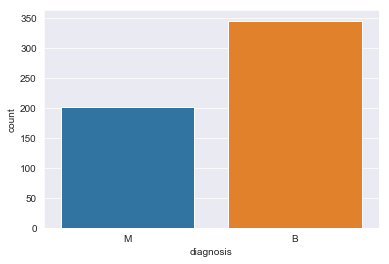

In [116]:
sns.countplot("diagnosis",data=train_data)

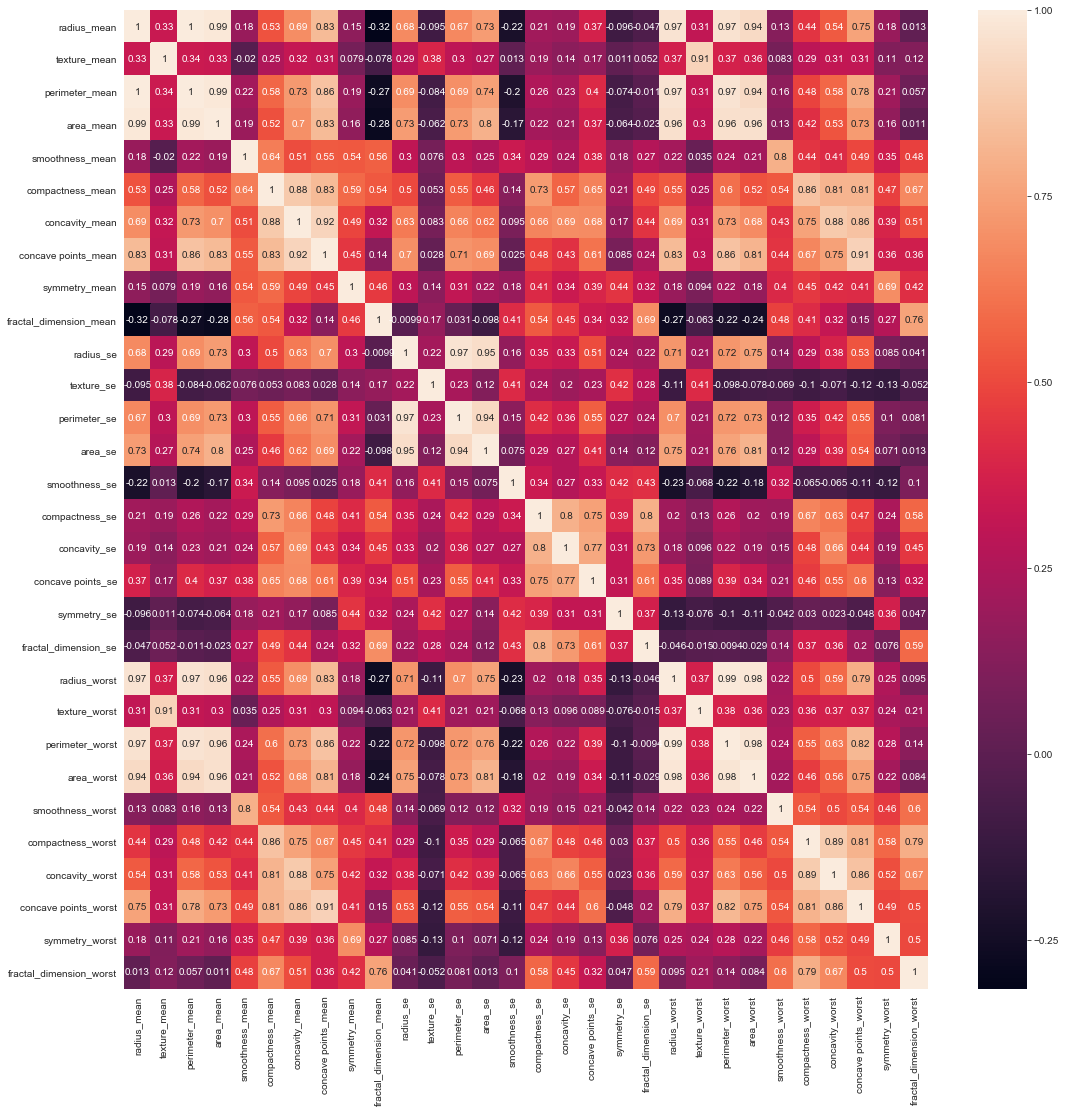

In [117]:
corr = train_data.corr()
plt.figure(figsize=(18,18))


sns.heatmap(corr, annot=True)

Observation:
* From the heat map we can see that the radius, perimeter and area (_mean, _se and worst) are highly corelated. So one or more of these parameters can be used as features for our prediction
* Furthermore, we can see a strong corelation between the Concave points, concavity and compactness (_mean, _se and _worst) and these can also be added as features for the prediction model.

I will continue by further plotting another heatmap in search of features that are not directly linked to each other like 'area,perimeter and mean' but are strongly corelated to each other

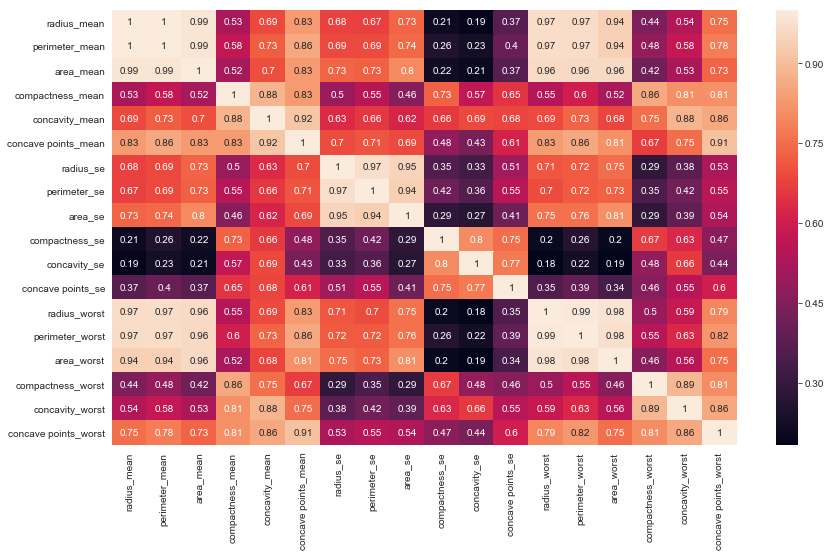

In [118]:
features = ['radius_mean','perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean','radius_se','perimeter_se',
            'area_se','compactness_se', 'concavity_se', 'concave points_se',
            'radius_worst','perimeter_worst','area_worst','compactness_worst', 'concavity_worst', 'concave points_worst']
corr_ = train_data[features].corr()

plt.figure(figsize=(14,8))


sns.heatmap(corr_, annot=True)

In [119]:
features_1 = ['perimeter_mean', 'concave points_mean', 'perimeter_se',
              'concave points_se','perimeter_worst','concave points_worst']

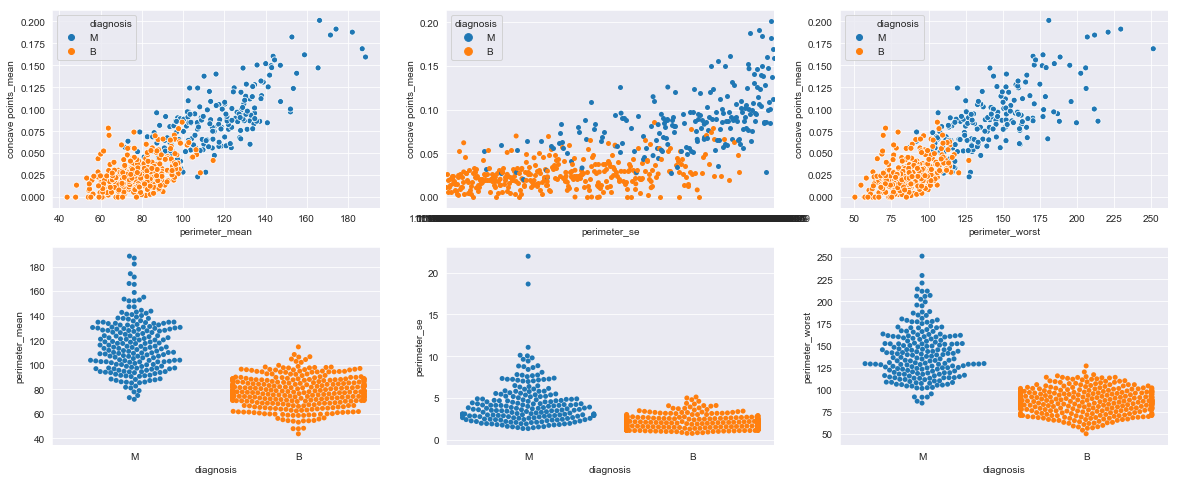

In [120]:
# plt.figure(figsize=(50,50))

fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(20,8))
sns.scatterplot("perimeter_mean","concave points_mean", hue='diagnosis', data=train_data, ax=axis[0,0])
sns.swarmplot("perimeter_se","concave points_mean",hue='diagnosis',data=train_data, ax=axis[0,1])
sns.scatterplot("perimeter_worst","concave points_mean",hue='diagnosis',data=train_data, ax=axis[0,2])

sns.swarmplot("diagnosis","perimeter_mean", data=train_data, ax=axis[1,0])
sns.swarmplot("diagnosis","perimeter_se",data=train_data, ax=axis[1,1])
sns.swarmplot("diagnosis","perimeter_worst",data=train_data, ax=axis[1,2])
